In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st

In [3]:
J_data = pd.read_csv("../EnhancerPredictions/17_June_data/J_EnhancerPredictions.txt", sep='\t')
data = pd.read_csv("../EnhancerPredictions/EnhancerPredictions.txt", sep='\t')

unique_genes = J_data[['TargetGene', 'TargetGeneTSS']].drop_duplicates()

In [4]:
print(len(J_data))
print(len(data))
print(len(unique_genes))

1372
1372
348


HiC data : ftp://ftp.broadinstitute.org/outgoing/lincRNA/forKristy/chr22_hic_for_kristy.tar.gz

Processing HiC data: 

python src/juicebox_dump.py \
--hic_file GSE63525_K562_combined.hic \
--juicebox "java -jar juicer_tools.jar" \
--outdir $HICDIR/raw/ \
--chromosomes 22

python src/make_bedgraph_from_HiC.py \
--outdir $HICDIR/bedgraph/ \
--genes example/config/RefSeqCurated.170308.bed.CollapsedGeneBounds.chr22.bed \
--hic_dir $HICDIR/raw/5kb_resolution_intrachromosomal/


In [138]:
#print(data.columns)

In [5]:
merged_df = pd.merge(J_data, data, how='inner', on=['chr', 'start', 'end', 'TargetGene', 'TargetGeneTSS'])
print(len(merged_df))
print(merged_df[:5])
#1261 common entries between the two

1370
     chr     start       end  DHS.ENCFF030DCL.bam.readCount_x  \
0  chr22  17080380  17081156                               96   
1  chr22  17083849  17085052                               84   
2  chr22  17081312  17081812                               32   
3  chr22  17080380  17081156                               96   
4  chr22  17085387  17085887                               25   

   DHS.ENCFF030DCL.bam.RPM_x  DHS.ENCFF030DCL.bam.readCount.quantile_x  \
0                     5.6886                                    0.8500   
1                     4.9775                                    0.8286   
2                     1.8962                                    0.6038   
3                     5.6886                                    0.8500   
4                     1.4814                                    0.5189   

   DHS.ENCFF030DCL.bam.RPM.quantile_x  DHS.ENCFF030DCL.bam.RPKM_x  \
0                              0.8500                      7.3306   
1                    

## Correlation Graph between K_ABC and J_ABC

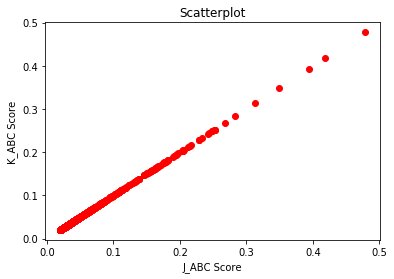

In [6]:
x= merged_df['ABC.Score_x']
y= merged_df['ABC.Score_y']
plt.xlabel('J_ABC Score')
plt.ylabel('K_ABC Score')
plt.title('Scatterplot')
plt.plot(x, y, 'ro')

# Look at different points in the scatterplot 
# for the bigger differences 

In [8]:
# Gaussian kernel density 
#nbins = 400
actual_scores_1 = np.asarray(x)
scores_1 = np.asarray(y)


#k = st.gaussian_kde([actual_scores_1, scores_1])
#xi, yi = np.mgrid[actual_scores_1.min():actual_scores_1.max():nbins*1j, scores_1.min():scores_1.max():nbins*1j]
#zi = k(np.vstack([xi.flatten(), yi.flatten()]))


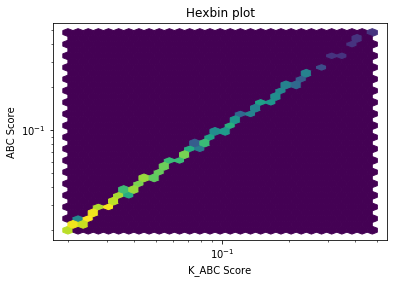

In [12]:
# Make Plot 
fig, axes = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True)
plt.xlabel('K_ABC Score')
plt.ylabel('ABC Score')
nbins=30

axes.set_title('Hexbin plot')
axes.hexbin(x, y, gridsize=nbins, bins='log',xscale='log', yscale='log')
#axes[1].set_title('Gaussian Kernel Density Estimation')
#axes[1].pcolormesh(xi,yi,zi.reshape(xi.shape), vmin=0, vmax=1)
#fig.tight_layout()

In [13]:
import scipy.stats

print("Pearson_correlation: {}".format(scipy.stats.pearsonr(actual_scores_1, scores_1)))
print("Spearman_correlation: {}".format(scipy.stats.spearmanr(actual_scores_1,scores_1)))

Pearson_correlation: (1.0, 0.0)
Spearman_correlation: SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)


(array([   0.,    0.,    0.,    0.,    0.,    0.,    0., 1370.,    0.,
           0.,    0.,    0.,    0.]),
 array([-0.007, -0.006, -0.005, -0.004, -0.003, -0.002, -0.001,  0.   ,
         0.001,  0.002,  0.003,  0.004,  0.005,  0.006]),
 <a list of 13 Patch objects>)

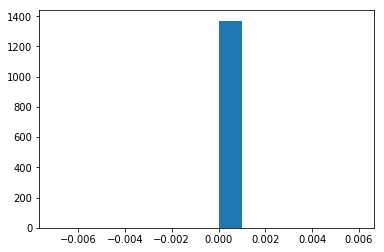

In [14]:
from matplotlib import pyplot as plt
import numpy as np

differences = np.array(x) - np.array(y)
plt.hist(differences, bins=np.arange(-0.007,0.007, 0.001))

In [15]:
print(abs(np.mean(differences)))
print(np.std(differences))


0.0
0.0


In [16]:
(differences>0.05).sum()

0